In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [2]:
df = pd.read_csv('D:/data/Diabetes/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

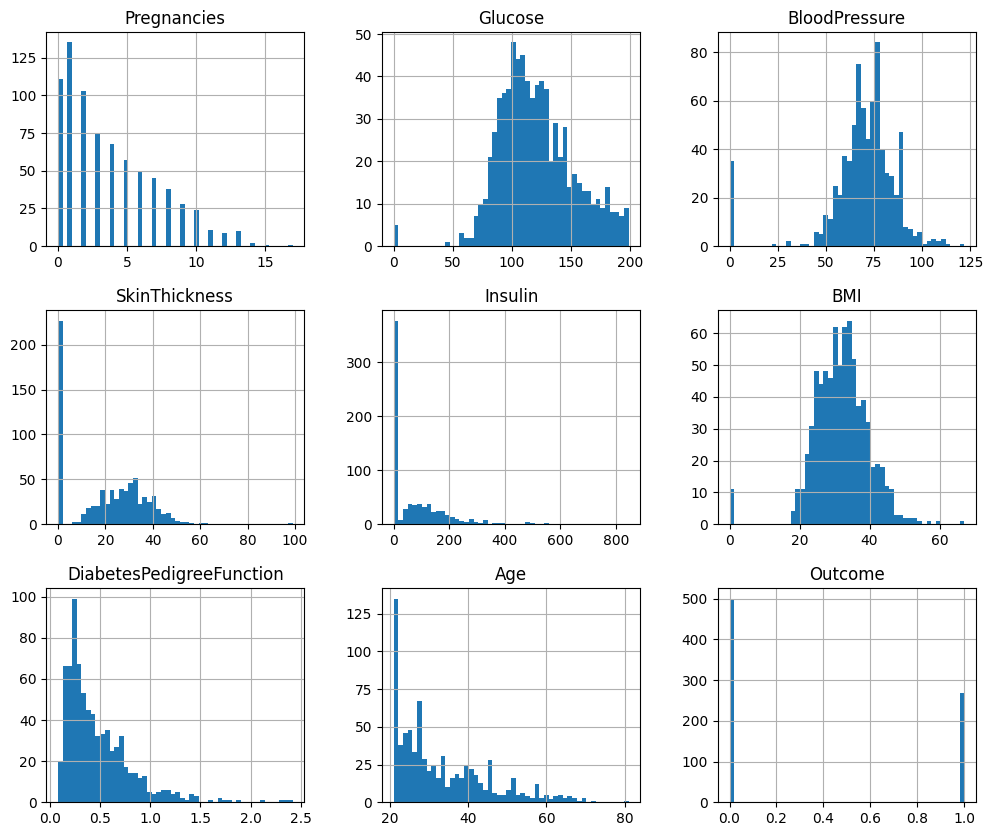

In [6]:
df.hist(figsize=(12,10),bins=50)

### Basically 0s in some columns like "Glucose, BloodPressure, SkinThickness, Insulin, BMI" are not logical and mean NAN

In [7]:
columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for column in columns:
    df[column] = df[column].replace(0, np.nan)
    df[column] = df[column].fillna(df[column].median())

### Now it's fixed!

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

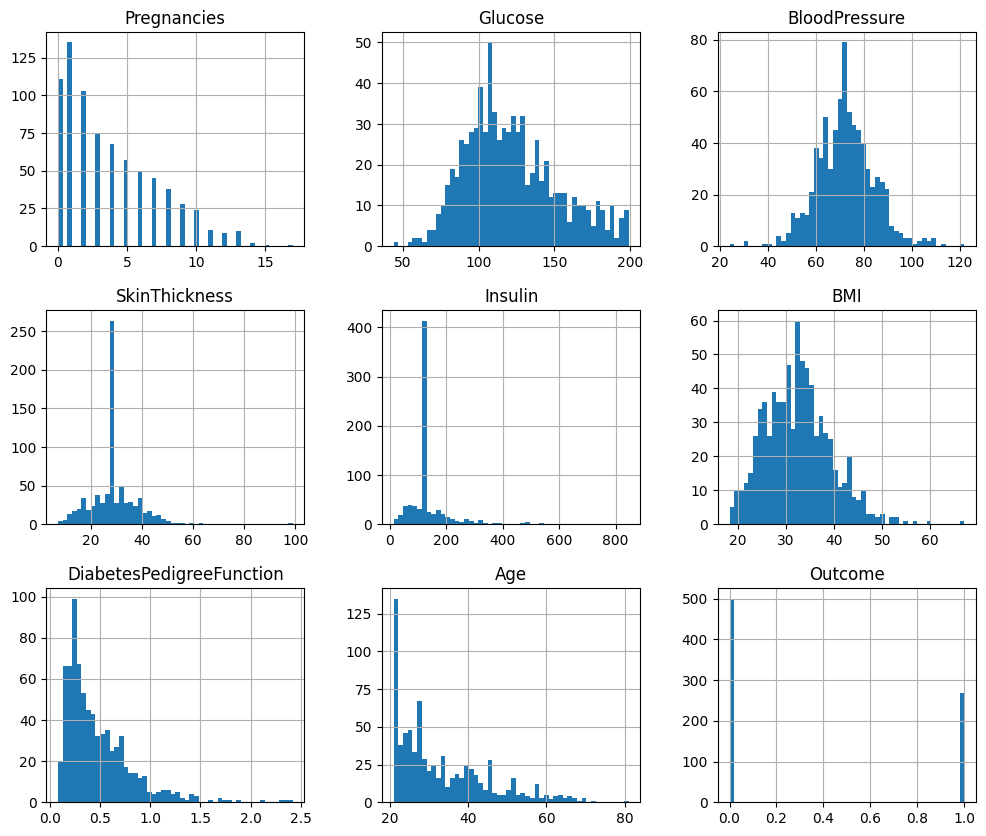

In [8]:
df.hist(figsize=(12,10),bins=50)

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Let's create some new features!

In [10]:
# Ratio of pregnancies to age, to examine if the number of pregnancies is high or low relative to the individual's age.
df['Pregnancies_Age_ratio'] = df['Pregnancies'] / df['Age']

# Ratio of glucose to blood pressure, to explore a potential relationship between glucose levels and blood pressure.
df['Glucose_BloodPressure_ratio'] = df['Glucose'] / df['BloodPressure']

# Ratio of glucose to insulin levels, which could indicate insulin resistance.
df['Glucose_Insulin_ratio'] = df['Glucose'] / df['Insulin']

# Age multiplied by Diabetes Pedigree Function, which might show a relationship between age and family history of diabetes.
df['Age_in_DiabetesPedigreeFunction'] = df['Age'] * df['DiabetesPedigreeFunction']

# Age multiplied by Body Mass Index (BMI) to investigate a potential relationship between age and weight/height.
df['Age_in_BMI'] = df['Age'] * df['BMI']

# Skin thickness multiplied by Body Mass Index (BMI) to explore the potential link between skin thickness and weight/height.
df['SkinThickness_in_BMI'] = df['SkinThickness'] * df['BMI']


In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_Age_ratio,Glucose_BloodPressure_ratio,Glucose_Insulin_ratio,Age_in_DiabetesPedigreeFunction,Age_in_BMI,SkinThickness_in_BMI
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,0.120000,2.055556,1.184000,31.350,1680.0,1176.0
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,0.032258,1.287879,0.680000,10.881,824.6,771.4
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,0.250000,2.859375,1.464000,21.504,745.6,675.7
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0.047619,1.348485,0.946809,3.507,590.1,646.3
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0.000000,3.425000,0.815476,75.504,1422.3,1508.5


In [12]:
df['Outcome2'] = df['Outcome']

df.drop('Outcome',axis=1,inplace=True)

df.rename(columns={'Outcome2':'Outcome'},inplace=True)

### I like my target be at the end of the DF :D

### Let's look at the correlations

In [13]:
df.corr()['Outcome'].sort_values(ascending=False)

Outcome                            1.000000
Glucose                            0.492782
Age_in_BMI                         0.362990
Glucose_BloodPressure_ratio        0.334585
BMI                                0.312038
SkinThickness_in_BMI               0.275337
Age_in_DiabetesPedigreeFunction    0.239768
Age                                0.238356
Pregnancies                        0.221898
SkinThickness                      0.214873
Insulin                            0.203790
DiabetesPedigreeFunction           0.173844
BloodPressure                      0.165723
Pregnancies_Age_ratio              0.163744
Glucose_Insulin_ratio             -0.006580
Name: Outcome, dtype: float64

<Axes: >

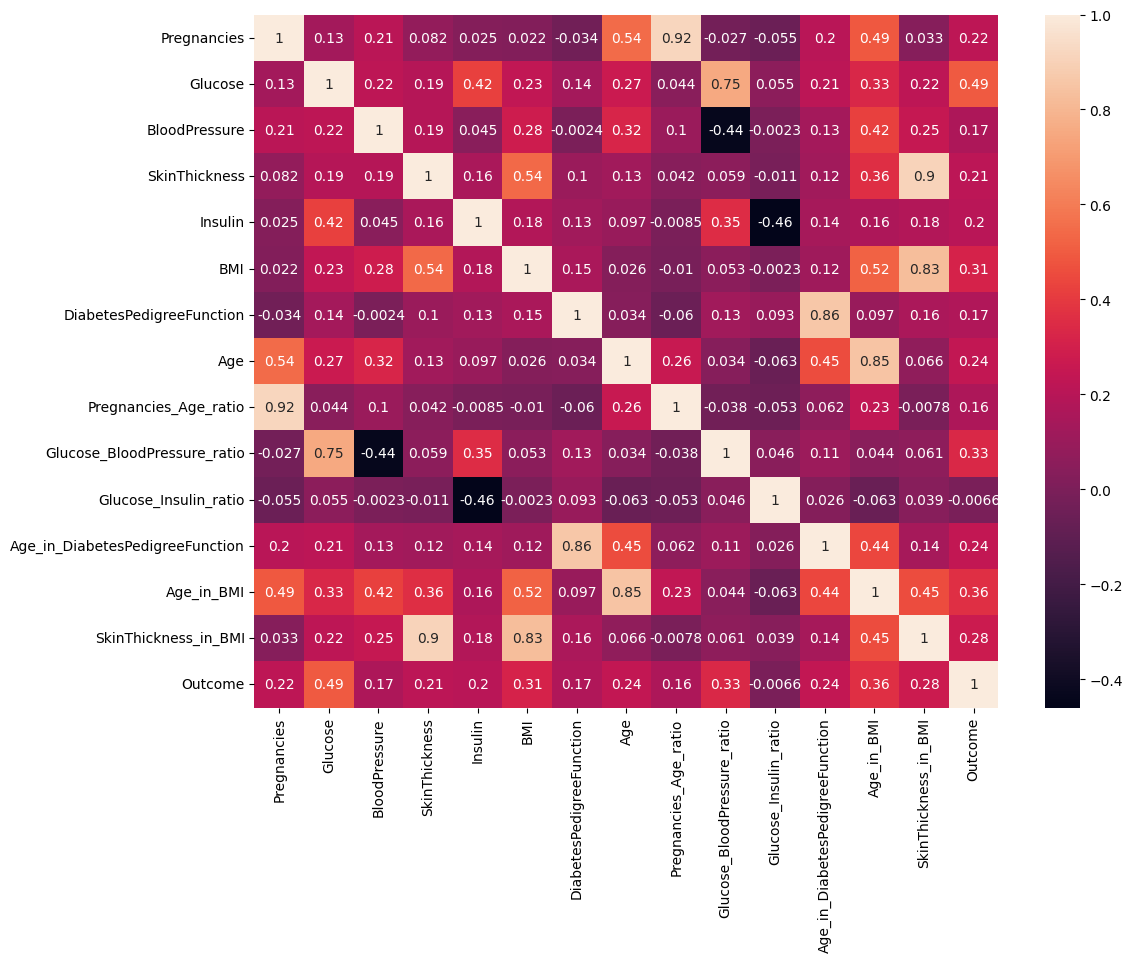

In [14]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True)

### Now let's prepare the data for the model!

In [15]:
# Drop the columns we don't need
X = df.drop(['Outcome','Glucose_Insulin_ratio'],axis=1)
# Assign the target
y = df['Outcome']

### Let's look at the target values

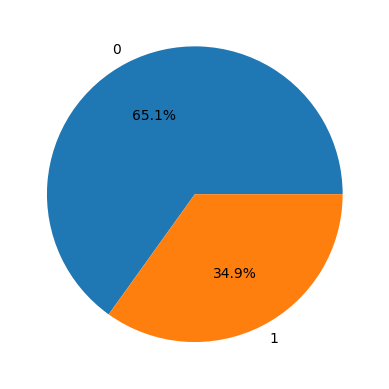

In [16]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%1.1f%%')
plt.show()

### The target is not balanced and it's gonna effect on the result 
### so let's fix it!

In [17]:
smote = SMOTE(random_state=42)
X_resampled,y_resampled = smote.fit_resample(X,y)

### Now it's better...

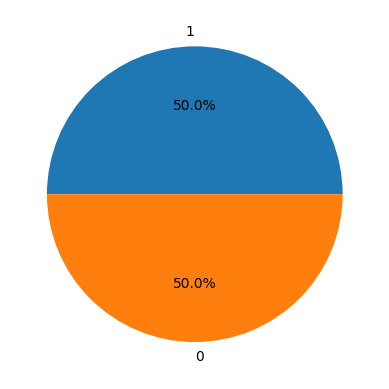

In [18]:
plt.pie(y_resampled.value_counts(), labels=y_resampled.value_counts().index, autopct='%1.1f%%')
plt.show()

In [19]:
# Split the data
Xtrain,Xtest,ytrain,ytest = train_test_split(X_resampled,y_resampled,train_size=0.8,random_state=42)

In [20]:
# Choose the best model
models = {
    "KNeighborsClassifier":KNeighborsClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "XGBClassifier":XGBClassifier(),
    "SGDClassifier":SGDClassifier(),
    "LogisticRegression":LogisticRegression(),
    "SVC":SVC()
}
for name,model_object in models.items():
    model = model_object
    model.fit(Xtrain,ytrain)
    pred = model.predict(Xtest)
    print(f"{name}:{metrics.f1_score(ytest,pred)}")

KNeighborsClassifier:0.7222222222222222
DecisionTreeClassifier:0.7450980392156863
RandomForestClassifier:0.8110599078341014
GradientBoostingClassifier:0.8075117370892019
XGBClassifier:0.7864077669902912
SGDClassifier:0.6847457627118644
LogisticRegression:0.7524752475247525
SVC:0.7168141592920354


C:\Users\hp\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
# Create the model
model = RandomForestClassifier(random_state=42)
model.fit(Xtrain,ytrain)

RandomForestClassifier(random_state=42)

In [22]:
# Check the different metrics
metrics_list = ['f1_score', 'recall_score', 'precision_score', 'accuracy_score', 'roc_auc_score']

for metric in metrics_list:
    # Get the metric function from metrics module dynamically
    metric_function = getattr(metrics, metric)
    # Calculate the metric and print the result
    print(f"{metric}: {metric_function(ytest, pred)}")

f1_score: 0.7168141592920354
recall_score: 0.801980198019802
precision_score: 0.648
accuracy_score: 0.68
roc_auc_score: 0.6787678767876788


### Wait a minute...
### There is an overfit!

In [23]:
# Check the score
print(f"train: {model.score(Xtrain,ytrain)}")
print(f"train: {model.score(Xtest,ytest)}")

train: 1.0
train: 0.79


### Let's Fix it!

### Use PCA to reduce the number of features

In [24]:
# Finding the best n_components
for i in range(2,14):
    pca = PCA(random_state=42,n_components=i)
    Xtrain_pca = pca.fit_transform(Xtrain)
    Xtest_pca = pca.transform(Xtest)
    
    model = RandomForestClassifier(random_state=42)
    model.fit(Xtrain_pca,ytrain)

    pred = model.predict(Xtest_pca)
    print(f"{i}: {metrics.f1_score(ytest,pred)}")

2: 0.7142857142857143
3: 0.7582938388625592
4: 0.7788461538461539
5: 0.7850467289719626
6: 0.8130841121495327
7: 0.8095238095238095
8: 0.839622641509434
9: 0.8133971291866029
10: 0.8285714285714286
11: 0.8173076923076923
12: 0.8262910798122066
13: 0.8341232227488151


In [25]:
# Reduce the number of features to 8 components
pca = PCA(random_state=42,n_components=8)
Xtrain_pca = pca.fit_transform(Xtrain)
Xtest_pca = pca.transform(Xtest)

### Use hyperparameter tuning to find the best optimization

In [26]:
# # Define the model
# rf = RandomForestClassifier(random_state=42)

# # Define parameters to be tested
# param_grid = {
#     'n_estimators': [100, 200, 300],        # Number of trees
#     'max_depth': [3, 4, 5, 6],              # Maximum depth of trees
#     'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
#     'min_samples_leaf': [1, 2, 4],          # Minimum samples required for each leaf node
# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# # Train the model
# grid_search.fit(Xtrain_pca, ytrain)

# # Print the best parameters
# print("Best Hyperparameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)


In [27]:
# Create the model
clf1 = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state=42)
clf2 = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42, class_weight='balanced')
clf3 = GradientBoostingClassifier(n_estimators=200, max_depth=6, random_state=42)

voting_clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gb', clf3)], voting='soft')
voting_clf.fit(Xtrain_pca, ytrain)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, penalty='l1',
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=6,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(max_depth=6,
                                                         n_estimators=200,
                                                         random_state=42))],
                 voting='soft')

In [28]:
# Predict
pred = voting_clf.predict(Xtest_pca)

# Check the different metrics
metrics_list = ['f1_score', 'recall_score', 'precision_score', 'accuracy_score', 'roc_auc_score']

for metric in metrics_list:
    # Get the metric function from metrics module dynamically
    metric_function = getattr(metrics, metric)
    # Calculate the metric and print the result
    print(f"{metric}: {metric_function(ytest, pred)}") 

f1_score: 0.8504672897196262
recall_score: 0.900990099009901
precision_score: 0.8053097345132744
accuracy_score: 0.84
roc_auc_score: 0.8393839383938393


In [29]:
print(metrics.classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        99
           1       0.81      0.90      0.85       101

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [30]:
# Cross validation
cvs = cross_val_score(voting_clf,Xtrain_pca,ytrain,scoring='f1',cv=10)
print(cvs)
print(f"Mean: {cvs.mean()}",end='\n\n')
print(f"Min:{cvs.min()} Max:{cvs.max()}")

[0.83783784 0.80952381 0.79545455 0.80487805 0.76190476 0.85057471
 0.82051282 0.83950617 0.79012346 0.77647059]
Mean: 0.8086786754522866

Min:0.7619047619047619 Max:0.8505747126436781


In [31]:
# Check the score
print(voting_clf.score(Xtrain_pca,ytrain))
print(voting_clf.score(Xtest_pca,ytest))

0.98875
0.84


### Create a confusion matrix

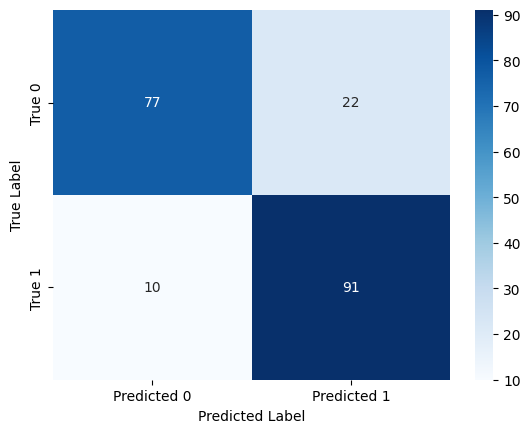

In [32]:
cm = metrics.confusion_matrix(ytest, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],  # This axis shows the predictions
            yticklabels=['True 0', 'True 1'])  # This axis shows the true values
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [34]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(Xtrain_pca, ytrain)
    pred = model.predict(Xtest_pca)    # Predict
    print(metrics.f1_score(ytest,pred))

0.7450980392156863
0.7351778656126482
0.7096774193548387
0.5555555555555556
